In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import os
data = pd.read_csv('Titanic_0.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
data.shape

(713, 12)

In [6]:
y = data['Survived']
X = data.drop(columns='Survived')

In [7]:
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [9]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            108
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          411
Embarked         1
dtype: int64

In [10]:
X_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
X_train[['Sex', 'Embarked']]

,Sex,Embarked
116,male,S
131,male,S
589,female,S
27,male,S
595,male,S
...,...,...
659,female,S
256,male,S
643,male,C
249,female,C


Most of the classifier are designed to wor

In [13]:
from sklearn.impute import SimpleImputer
# 处理missing value
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder 就像 dummies
from sklearn.pipeline import make_pipeline

ohe = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded = ohe.fit_transform(X_train[['Sex', 'Embarked']])
X_encoded.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.]])

In [14]:
X_encoded

<534x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1068 stored elements in Compressed Sparse Row format>

In [61]:
col_cat = ['Sex', 'Embarked'] # category
col_num = ['Age', 'SibSp', 'Parch', 'Fare'] # numerical

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [63]:
from sklearn.preprocessing import StandardScaler
# 使用 OneHotEncoder() 对category数据进行dummies
scaler_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_train_cat_enc = scaler_cat.fit_transform(X_train_cat)
X_test_cat_enc = scaler_cat.transform(X_test_cat)
# 使用 StandardScaler() 对numerical数据进行处理
scaler_num = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

In [64]:
X_train_cat_enc

<534x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1068 stored elements in Compressed Sparse Row format>

In [65]:
X_train_num_scaled

array([[-0.84978858,  0.42402614,  0.65645945,  0.06750954],
       [-1.00181375, -0.48169369, -0.45639562, -0.46804832],
       [ 1.35457638,  0.42402614,  2.88216959,  0.02222428],
       ...,
       [-2.26210241, -0.48169369,  0.65645945, -0.47082836],
       [-0.92580117,  1.32974597,  1.76931452,  4.36960987],
       [-1.15383892,  0.42402614, -0.45639562, -0.35761519]])

In [66]:
import numpy as np
from scipy import sparse

X_train_scaled = sparse.hstack((X_train_cat_enc, sparse.csr_matrix(X_train_num_scaled)))
X_test_scaled = sparse.hstack((X_test_cat_enc, sparse.csr_matrix(X_test_num_scaled)))
# 以上都是在做数据的预处理（分割数据集，填充missing value，scale）

In [67]:
X_test_scaled

<179x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1041 stored elements in COOrdinate format>

In [68]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
accuracy

0.7430167597765364

In [69]:
from sklearn.compose import make_column_transformer
# 对不同类型的数据进行不同的处理，放进统一的preprocessor里
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
pipe_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

pipe = make_pipeline(preprocessor, LogisticRegression())

pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
accuracy

0.7430167597765364

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

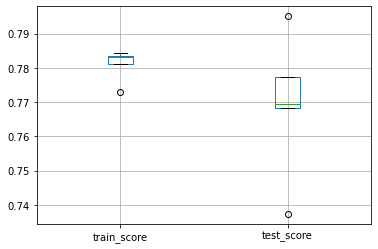

In [71]:
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

pipe = make_pipeline(preprocessor, LogisticRegression())

param_grid = {'columntransformer__pipeline-2__simpleimputer__strategy': ['mean', 'median'], 
             'logisticregression__C': [0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)
scores = pd.DataFrame(cross_validate(grid, X, y, scoring='balanced_accuracy', cv=5, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()